In [5]:
%%html
<style type="text/css">
        .CodeMirror{
            font-size: 14px;
            font-family: D2Coding; 
        }
</style>

In [6]:
import platform

from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    rc("font", family='AppleGothic')
elif platform.system() == "Windows":
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("알수없는시스템입니다.")
    
%matplotlib inline

In [7]:
import numpy as np
import pandas as pd

crime_anal_raw = pd.read_excel('data/crime_Seoul.xlsx', convert_float=True)
crime_anal_raw.head(28)

,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2018,합계,101948,74487,143,139,143,151,6412,6046,39175,19762,56075,48389
2,2018,종로구,3690,3913,6,7,3,7,236,1100,1483,969,1962,1830
3,2018,중구,4030,2679,2,2,11,11,207,115,1855,832,1955,1719
4,2018,용산구,3411,2543,1,1,3,2,331,285,1096,522,1980,1733
5,2018,성동구,2457,1787,2,2,5,8,126,102,999,487,1325,1188
6,2018,광진구,3915,2789,7,5,2,1,229,184,1769,974,1908,1625
7,2018,동대문구,3680,2968,2,2,5,4,145,112,1447,930,2081,1920
8,2018,중랑구,4288,3222,4,5,3,3,174,145,1526,876,2581,2193
9,2018,성북구,3042,2277,7,6,1,2,183,140,1164,635,1687,1494


In [8]:
crime_anal_raw.drop([0], inplace=True)
crime_anal_raw.drop([1], inplace=True)
crime_anal_raw.head()

,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
2,2018,종로구,3690,3913,6,7,3,7,236,1100,1483,969,1962,1830
3,2018,중구,4030,2679,2,2,11,11,207,115,1855,832,1955,1719
4,2018,용산구,3411,2543,1,1,3,2,331,285,1096,522,1980,1733
5,2018,성동구,2457,1787,2,2,5,8,126,102,999,487,1325,1188
6,2018,광진구,3915,2789,7,5,2,1,229,184,1769,974,1908,1625


In [9]:
#자치구로 정렬
crime_anal = pd.pivot_table(crime_anal_raw, index='자치구', aggfunc=np.sum)
crime_anal.head()

,강간강제추행,강간강제추행.1,강도,강도.1,기간,살인,살인.1,절도,절도.1,폭력,폭력.1,합계,합계.1
자치구,,,,,,,,,,,,,
강남구,600,523,14,10,2018,10,13,3004,1317,3885,3333,7513,5196
강동구,170,143,7,7,2018,3,3,1515,765,2224,1871,3919,2789
강북구,188,135,7,7,2018,8,6,1112,603,2122,1992,3437,2743
강서구,269,246,6,3,2018,11,9,1724,982,2619,2229,4629,3469
관악구,352,305,10,12,2018,9,9,2012,1025,2643,2302,5026,3653


In [10]:
#검거율 columns 만들기 // 필요없는데이터 삭제

crime1 = np.array(crime_anal['합계.1'], dtype=float)
crime2 = np.array(crime_anal['합계'], dtype=float)
crime_anal['범죄검거율'] = crime1 / crime2 * 100

crime3 = np.array(crime_anal['살인.1'], dtype=float)
crime4 = np.array(crime_anal['살인'], dtype=float)
crime_anal['살인검거율'] = crime3 / crime4 * 100

crime5 = np.array(crime_anal['강도.1'], dtype=float)
crime6 = np.array(crime_anal['강도'], dtype=float)
crime_anal['강도검거율'] = crime5 / crime6 * 100

crime7 = np.array(crime_anal['강간강제추행.1'], dtype=float)
crime8 = np.array(crime_anal['강간강제추행'], dtype=float)
crime_anal['강간검거율'] = crime7 / crime8 * 100

crime9 = np.array(crime_anal['절도.1'], dtype=float)
crime10 = np.array(crime_anal['절도'], dtype=float)
crime_anal['절도검거율'] = crime9 / crime10 * 100

crime11 = np.array(crime_anal['폭력.1'], dtype=float)
crime12 = np.array(crime_anal['폭력'], dtype=float)
crime_anal['폭력검거율'] = crime11 / crime12 * 100

crime_anal.rename(columns = {'강간강제추행':'강간'}, inplace=True)

del crime_anal['기간']
del crime_anal['합계.1']
del crime_anal['합계']
del crime_anal['살인.1']
del crime_anal['강도.1']
del crime_anal['강간강제추행.1']
del crime_anal['절도.1']
del crime_anal['폭력.1']

crime_anal.head()


,강간,강도,살인,절도,폭력,범죄검거율,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,,
강남구,600,14,10,3004,3885,69.160122,130.000000,71.428571,87.166667,43.841545,85.791506
강동구,170,7,3,1515,2224,71.166114,100.000000,100.000000,84.117647,50.495050,84.127698
강북구,188,7,8,1112,2122,79.807972,75.000000,100.000000,71.808511,54.226619,93.873704
강서구,269,6,11,1724,2619,74.940592,81.818182,50.000000,91.449814,56.960557,85.108820
관악구,352,10,9,2012,2643,72.682053,100.000000,120.000000,86.647727,50.944334,87.097995


In [11]:
#100% 넘는 것 데이터 다듬기
con_list = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

for column in con_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100
    
crime_anal.head()

,강간,강도,살인,절도,폭력,범죄검거율,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,,
강남구,600,14,10,3004,3885,69.160122,100.000000,71.428571,87.166667,43.841545,85.791506
강동구,170,7,3,1515,2224,71.166114,100.000000,100.000000,84.117647,50.495050,84.127698
강북구,188,7,8,1112,2122,79.807972,75.000000,100.000000,71.808511,54.226619,93.873704
강서구,269,6,11,1724,2619,74.940592,81.818182,50.000000,91.449814,56.960557,85.108820
관악구,352,10,9,2012,2643,72.682053,100.000000,100.000000,86.647727,50.944334,87.097995


In [12]:
#정규화

from sklearn import preprocessing

col = ["살인","강도","강간","절도","폭력"]
x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled, columns = col, index = crime_anal.index)

col2 =  ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
강남구,0.5625,1.000000,1.000000,1.000000,1.000000,87.166667,71.428571,100.000000,43.841545,85.791506
강동구,0.1250,0.461538,0.117043,0.330184,0.351172,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,0.4375,0.461538,0.154004,0.148898,0.311328,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,0.6250,0.384615,0.320329,0.424202,0.505469,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,0.5000,0.692308,0.490760,0.553756,0.514844,86.647727,100.000000,100.000000,50.944334,87.097995


In [13]:
#CCTV_Seoul 자료와 합치기

result_CCTV = pd.read_csv('data/CCTV_result.csv', encoding="utf-8",
                         index_col='자치구')
crime_anal_norm[['인구', 'CCTV']] = result_CCTV[['인구','소계']]
crime_anal_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구,CCTV
자치구,,,,,,,,,,,,
강남구,0.5625,1.000000,1.000000,1.000000,1.000000,87.166667,71.428571,100.000000,43.841545,85.791506,546158,5221.0
강동구,0.1250,0.461538,0.117043,0.330184,0.351172,84.117647,100.000000,100.000000,50.495050,84.127698,461547,1879.0
강북구,0.4375,0.461538,0.154004,0.148898,0.311328,71.808511,100.000000,75.000000,54.226619,93.873704,315395,1265.0
강서구,0.6250,0.384615,0.320329,0.424202,0.505469,91.449814,50.000000,81.818182,56.960557,85.108820,593203,1617.0
관악구,0.5000,0.692308,0.490760,0.553756,0.514844,86.647727,100.000000,100.000000,50.944334,87.097995,516318,3985.0


In [14]:
#범죄 항목 추가 // 범죄 발생 건수의 합 = 범죄 column
col = ["살인","강도","강간","절도","폭력"]
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구,CCTV,범죄
자치구,,,,,,,,,,,,,
강남구,0.5625,1.000000,1.000000,1.000000,1.000000,87.166667,71.428571,100.000000,43.841545,85.791506,546158,5221.0,4.562500
강동구,0.1250,0.461538,0.117043,0.330184,0.351172,84.117647,100.000000,100.000000,50.495050,84.127698,461547,1879.0,1.384938
강북구,0.4375,0.461538,0.154004,0.148898,0.311328,71.808511,100.000000,75.000000,54.226619,93.873704,315395,1265.0,1.513269
강서구,0.6250,0.384615,0.320329,0.424202,0.505469,91.449814,50.000000,81.818182,56.960557,85.108820,593203,1617.0,2.259614
관악구,0.5000,0.692308,0.490760,0.553756,0.514844,86.647727,100.000000,100.000000,50.944334,87.097995,516318,3985.0,2.751667


In [15]:
#검거율 통합
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head(30)

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구,CCTV,범죄,검거
자치구,,,,,,,,,,,,,,
강남구,0.5625,1.000000,1.000000,1.000000,1.000000,87.166667,71.428571,100.000000,43.841545,85.791506,546158,5221.0,4.562500,388.228288
강동구,0.1250,0.461538,0.117043,0.330184,0.351172,84.117647,100.000000,100.000000,50.495050,84.127698,461547,1879.0,1.384938,418.740394
강북구,0.4375,0.461538,0.154004,0.148898,0.311328,71.808511,100.000000,75.000000,54.226619,93.873704,315395,1265.0,1.513269,394.908833
강서구,0.6250,0.384615,0.320329,0.424202,0.505469,91.449814,50.000000,81.818182,56.960557,85.108820,593203,1617.0,2.259614,365.337373
관악구,0.5000,0.692308,0.490760,0.553756,0.514844,86.647727,100.000000,100.000000,50.944334,87.097995,516318,3985.0,2.751667,424.690056
광진구,0.3750,0.076923,0.238193,0.444444,0.227734,80.349345,50.000000,71.428571,55.059356,85.167715,363925,1581.0,1.362295,342.004987
구로구,0.4375,0.615385,0.281314,0.421053,0.586328,72.400000,100.000000,100.000000,45.835760,83.262562,436707,3227.0,2.341580,401.498322
금천구,0.3125,0.461538,0.178645,0.174089,0.229297,92.500000,85.714286,100.000000,55.222603,90.219665,250554,1634.0,1.356069,423.656554
노원구,0.2500,0.307692,0.166324,0.288349,0.412500,89.175258,100.000000,80.000000,41.139241,82.234355,533041,1906.0,1.424866,392.548854


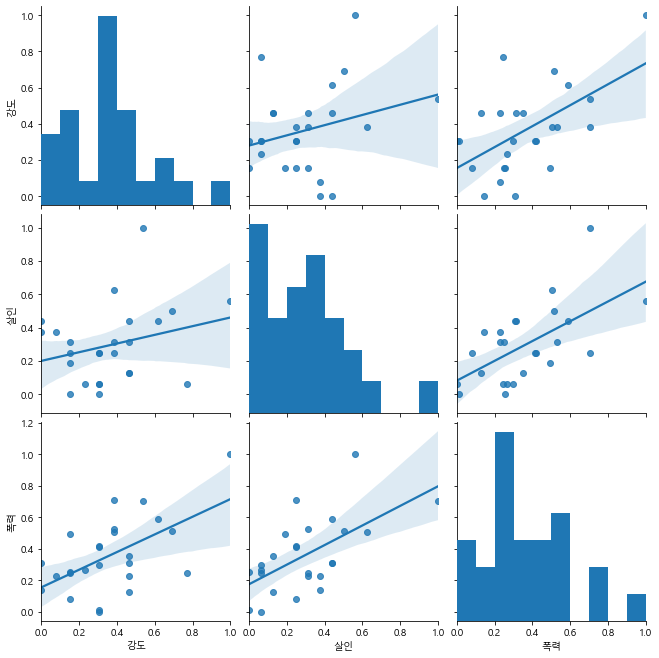

In [16]:
#시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(crime_anal_norm, vars=['강도','살인','폭력'], kind='reg', height=3)
plt.show()

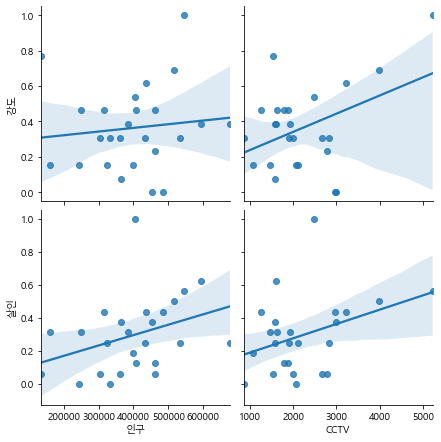

In [17]:
#대채로 양의 상관관계
sns.pairplot(crime_anal_norm, x_vars=['인구','CCTV'],
             y_vars=['강도','살인'], kind='reg', height=3)
plt.show()

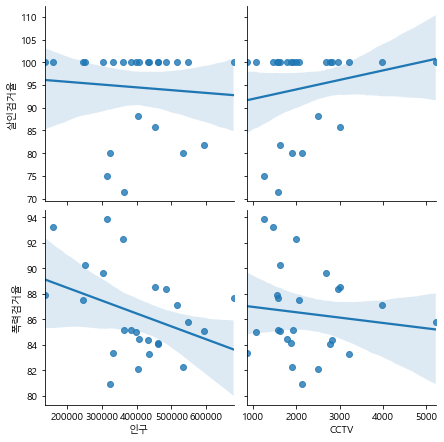

In [18]:
#폭력검거율 - 음의 상관관계
sns.pairplot(crime_anal_norm, x_vars=['인구','CCTV'],
             y_vars=['살인검거율','폭력검거율'], kind='reg', height=3)
plt.show()

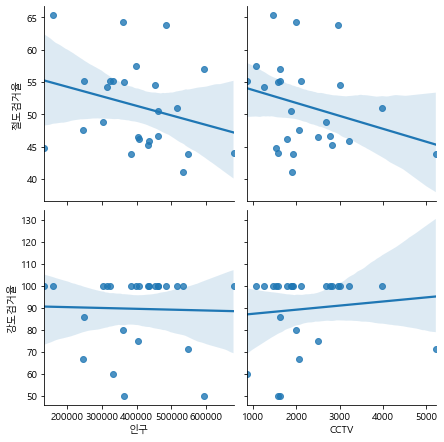

In [19]:
#절도검거율 그래프 대체로 음의 상관관계
sns.pairplot(crime_anal_norm, x_vars=['인구','CCTV'],
             y_vars=['절도검거율','강도검거율'], kind='reg', height=3)
plt.show()

In [20]:
#r검거율의 합계인 검거 항목 최고 값을 100으로 한정하고 값 정렬
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거']/ tmp_max * 100
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구,CCTV,범죄,검거
자치구,,,,,,,,,,,,,,
종로구,0.3125,0.153846,0.252567,0.315789,0.248828,100.000000,100.000000,100.0,65.340526,93.272171,160520,1471.0,1.283530,100.000000
은평구,0.4375,0.000000,0.154004,0.223572,0.308594,89.893617,100.000000,100.0,63.849765,88.368794,483938,2962.0,1.123670,96.402079
중랑구,0.1875,0.153846,0.125257,0.335133,0.490625,83.333333,100.000000,100.0,57.404980,84.967067,399415,1068.0,1.292361,92.824595
관악구,0.5000,0.692308,0.490760,0.553756,0.514844,86.647727,100.000000,100.0,50.944334,87.097995,516318,3985.0,2.751667,92.603205
금천구,0.3125,0.461538,0.178645,0.174089,0.229297,92.500000,85.714286,100.0,55.222603,90.219665,250554,1634.0,1.356069,92.377851


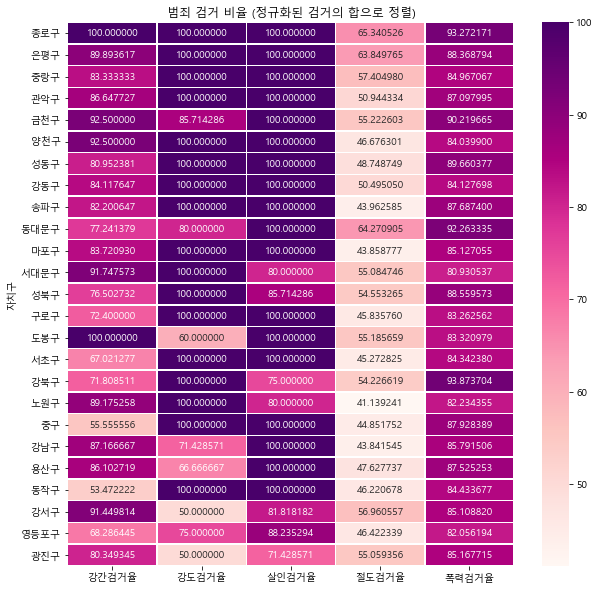

In [21]:
#heatmap그리기 검거율

taret_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm_sort = crime_anal_norm_sort.sort_values(by='검거', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[taret_col], annot=True, fmt='f',
           linewidths=.5, cmap="RdPu")
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

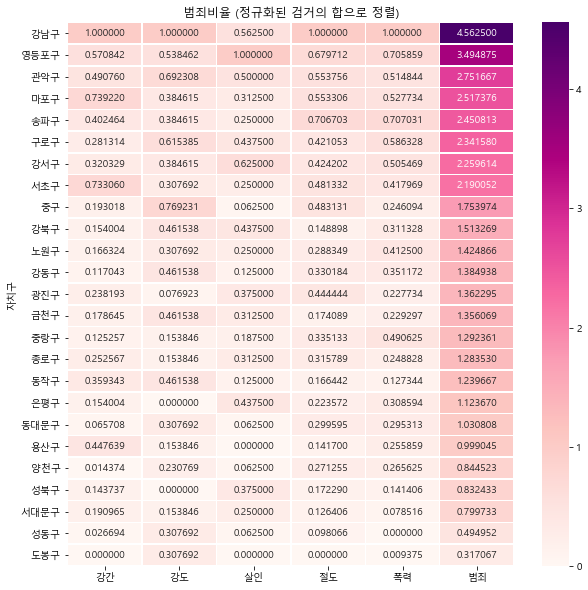

In [22]:
#heatmap그리기 범죄

taret_col = ['강간','강도','살인','절도','폭력','범죄']
crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
crime_anal_norm_sort = crime_anal_norm_sort.sort_values(by='범죄', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[taret_col], annot=True, fmt='f',
           linewidths=.5, cmap="RdPu")

plt.title('범죄비율 (정규화된 검거의 합으로 정렬)')
plt.show()

In [23]:
crime_anal_norm.to_csv('data/crime_in_Seoul_final.csv', sep=',', encoding='utf-8')

In [24]:
#포틀랜드
import folium
map_osm = folium.Map(location=[45.5236, -122.6750], zoom_start=13)
map_osm

In [25]:
stamen = folium.Map(location=[45.5236, -122.6750], tiles="Stamen Toner", zoom_start=13)
stamen

In [26]:
stamen = folium.Map(location=[45.5236, -122.6750], tiles="Stamen Terrain", zoom_start=13)
stamen

In [27]:
map_1 = folium.Map(location=[45.5236, -122.6750], tiles="Stamen Terrain", zoom_start=12)

folium.Marker([45.3288, -121.6625], popup='Mt. Hood Meadows',
             icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([45.3311, -121.7113], popup='Timberline Lodge',
             icon=folium.Icon(color='green')).add_to(map_1)
folium.Marker([45.3300, -121.6823], popup='Some Other Location',
             icon=folium.Icon(color='red', icon='info-sign')).add_to(map_1)
map_1

In [28]:
map_2 = folium.Map(location=[45.5236, -122.6750], tiles="Stamen Toner", zoom_start=13)

folium.Marker([45.5244, -122.6699], popup='The Waterfront').add_to(map_2)

folium.CircleMarker([45.5215, -122.6261], radius=50,
                   popup="Laurelhurst Park", color='#3186cc',
                   fill_color = "#3186cc").add_to(map_2)
map_2

In [29]:
map_5 = folium.Map(location=[45.5236, -122.6750], tiles="Stamen Toner", zoom_start=13)

folium.RegularPolygonMarker([45.5012, -122.6655],
                           popup="Ross Island Bridge", fill_color='#132b5e',
                           number_of_sides=3, radius=10).add_to(map_5)

folium.RegularPolygonMarker([45.5132, -122.6708],
                           popup="Hawthorne Bridge", fill_color='#45647d',
                           number_of_sides=4, radius=10).add_to(map_5)

folium.RegularPolygonMarker([45.5275, -122.6692],
                           popup="Steel Bridge", fill_color='#769d96',
                           number_of_sides=6, radius=10).add_to(map_5)

folium.RegularPolygonMarker([45.5318, -122.6745],
                           popup="Broadway Bridge", fill_color='#769d96',
                           number_of_sides=8, radius=10).add_to(map_5)
map_5

In [30]:
import folium
import pandas as pd

state_unemplyment = 'data/02. folium_US_Unemployment_Oct2012.csv'

state_data = pd.read_csv(state_unemplyment)

state_geo = 'data/02. folium_us-states.json'

map = folium.Map(location=[40, -98], zoom_start=4)
map.choropleth(geo_data=state_geo, data=state_data,
              columns=["State", "Unemployment"],
              key_on='feature.id',
              fill_color="YlGn",
              legend_name="Unemployment Rate (%)")

map

C:\Users\mrhi6\anaconda3\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [31]:
import json
geo_path = 'data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [33]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                tiles="Stamen Toner")
map.choropleth(geo_data = geo_str,
              data = crime_anal_norm['살인'],
              columns = [crime_anal_norm.index, crime_anal_norm['살인']],
              fill_color = "PuRd", #PuRd, YlGnBu,
              key_on = 'feature.id')
map

C:\Users\mrhi6\anaconda3\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [34]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                tiles="Stamen Toner")
map.choropleth(geo_data = geo_str,
              data = crime_anal_norm['강간'],
              columns = [crime_anal_norm.index, crime_anal_norm['강간']],
              fill_color = "PuRd", #PuRd, YlGnBu,
              key_on = 'feature.id')
map

In [35]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                tiles="Stamen Toner")
map.choropleth(geo_data = geo_str,
              data = crime_anal_norm['범죄'],
              columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
              fill_color = "PuRd", #PuRd, YlGnBu,
              key_on = 'feature.id')
map

In [36]:
tmp_criminal = crime_anal_norm['살인']/ crime_anal_norm['인구'] *100000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                tiles="Stamen Toner")

map.choropleth(geo_data = geo_str,
              data = tmp_criminal,
              columns = [crime_anal_norm.index, tmp_criminal],
              fill_color = "PuRd", #PuRd, YlGnBu,
              key_on = 'feature.id')
map

C:\Users\mrhi6\anaconda3\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [37]:
tmp_criminal = crime_anal_norm['범죄']/ crime_anal_norm['인구'] *100000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                tiles="Stamen Toner")

map.choropleth(geo_data = geo_str,
              data = tmp_criminal,
              columns = [crime_anal_norm.index, tmp_criminal],
              fill_color = "PuRd", #PuRd, YlGnBu,
              key_on = 'feature.id')
map

In [38]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                tiles="Stamen Toner")

map.choropleth(geo_data = geo_str,
              data = crime_anal_norm['검거'],
              columns = [crime_anal_norm.index, crime_anal_norm['검거']],
              fill_color = "YlGnBu", #PuRd, YlGnBu,
              key_on = 'feature.id')
map

C:\Users\mrhi6\anaconda3\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
